In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Charger les données
data = pd.read_csv('ressources/boyle.csv', sep=';')

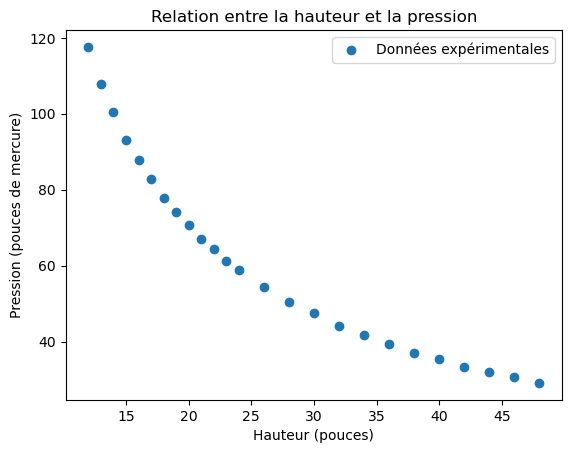

In [5]:
# Représenter le nuage de points
plt.scatter(data['Height'], data['Pressure'], label='Données expérimentales')
plt.xlabel('Hauteur (pouces)')
plt.ylabel('Pression (pouces de mercure)')
plt.title('Relation entre la hauteur et la pression')
plt.legend()
plt.show()

In [6]:
a = data[['nHeure','population']].cov()['nHeure']['population']/data[['nHeure','population']].cov()['nHeure']['nHeure']
b = data['population'].mean() - a*data['nHeure'].mean()

a, b

In [7]:
# Ramener les données dans une représentation linéaire
# P = a / V => ln(P) = ln(a) - ln(V)
log_height = np.log(data['Height'])
log_pressure = np.log(data['Pressure'])

In [8]:
# Estimer les constantes a et Constante
popt, pcov = curve_fit(model, data['Height'], data['Pressure'])
a = popt[0]

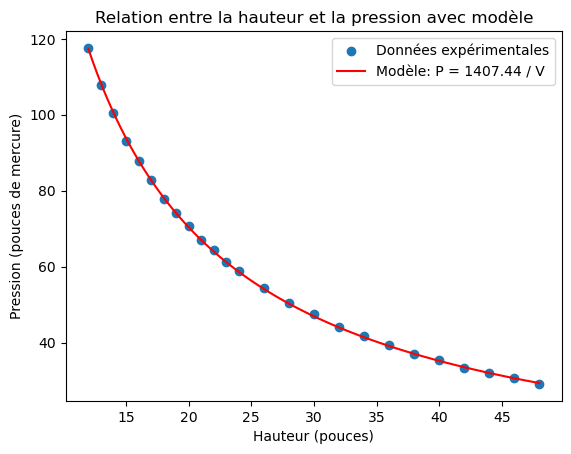

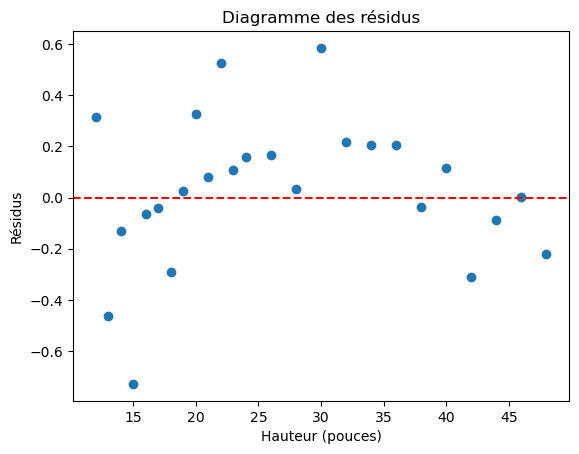

In [9]:
# Superposer la courbe modèle au nuage de points initial
heights = np.linspace(min(data['Height']), max(data['Height']), 100)
pressures = model(heights, a)

plt.scatter(data['Height'], data['Pressure'], label='Données expérimentales')
plt.plot(heights, pressures, color='red', label=f'Modèle: P = {a:.2f} / V')
plt.xlabel('Hauteur (pouces)')
plt.ylabel('Pression (pouces de mercure)')
plt.title('Relation entre la hauteur et la pression avec modèle')
plt.legend()
plt.show()

# Visualiser les résidus
residuals = data['Pressure'] - model(data['Height'], a)
plt.scatter(data['Height'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Hauteur (pouces)')
plt.ylabel('Résidus')
plt.title('Diagramme des résidus')
plt.show()